# Scikit-learn analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


import untransformed data

In [2]:
from utils import read_data
df, X, y1, y2 = read_data("~/GitHub/3pt-shooting/data/preprocessed.csv")
display(df.head())

,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,3P,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,next_3P%,3pt_dif
0,PG,31.0,ATL,80,80,2195,268,644,0.416,126,...,3.0,1.7,4.8,0.104,0.1,-0.2,-0.2,1.0,0.433825,0.044825
1,SG,29.0,ATL,79,0,2460,496,1105,0.449,163,...,5.6,1.7,7.3,0.143,3.5,-1.1,2.4,2.7,0.341000,-0.041000
2,SF,31.0,ATL,79,5,1317,175,393,0.445,57,...,2.1,1.1,3.1,0.114,-0.4,-0.6,-0.9,0.4,0.326041,-0.010959
3,SG,28.0,ATL,76,76,2886,635,1386,0.458,129,...,6.0,2.4,8.4,0.140,3.4,-0.7,2.7,3.4,0.297000,-0.072000
4,SF,23.0,ATL,81,81,2468,302,664,0.455,40,...,3.1,2.6,5.7,0.112,-0.4,0.1,-0.4,1.0,0.336000,0.033000


Program transformations and normalization

In [3]:
from sklearn.pipeline import Pipeline
from utils import pipeline
    
ord_names = ['GS', 'SEASON']
preprocessor = pipeline(X, ord_names)


split data into training and test sets, transform data, use y1 first

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)



try various linear regression algorithms

In [6]:
from sklearn.linear_model import LinearRegression
from utils import scores, model_train

lin = LinearRegression()

param_grid = {
    'model__fit_intercept': [False,True]
}

ln_reg = model_train(lin, X_train, y1_train, preprocessor=preprocessor, param_grid=param_grid)



rsquared:	0.258
Mean squared error:	0.001290
Mean absolute error:	0.0283


In [ ]:
from sklearn.linear_model import Ridge

param_grid = {
    'model__alpha': np.logspace(-5,5, num=11, endpoint=5, base=10)
}

ridge = model_train(Ridge(), X_train, y1_train, preprocessor=preprocessor, param_grid=param_grid)


rsquared:	0.224
Mean squared error:	0.001350
Mean absolute error:	0.0290


These linear regressors perform very poorly

In [7]:
from sklearn.ensemble import RandomForestRegressor

# create parameter grid
param_grid = {
    'model__max_depth': [*list(np.linspace(1,3)), None]
}


tree = model_train(RandomForestRegressor(), X_train, y1_train, preprocessor=preprocessor, param_grid=param_grid)

rsquared:	0.882
Mean squared error:	0.000206
Mean absolute error:	0.0112


Try baseline regressor, 

Training Error:
rsquared:	0.000
Mean squared error:	0.001739
Mean absolute error:	0.0325

Test Error:
rsquared:	-0.001
Mean squared error:	0.001774
Mean absolute error:	0.0327


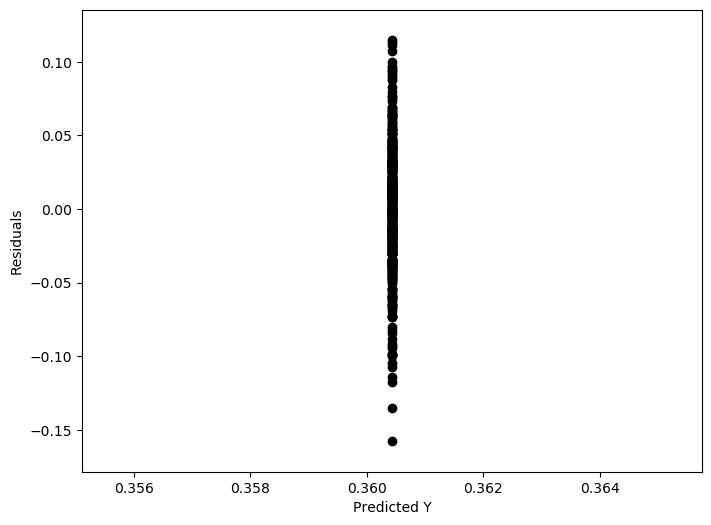

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['POS', 'TEAM'], dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  Index(['GS', 'SEASON'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                        

In [8]:
from sklearn.dummy import DummyRegressor

model(DummyRegressor(), X_train, X_test, y1_train, y1_test, preprocessor=preprocessor)
